# Aggregation and Discretization Techniques

This notebook demonstrates how to aggregate and discretize customer data using pandas. We'll explore data summarization techniques and convert continuous variables into categorical ones for better analysis and visualization.

**Learning Objectives:**
- Understand data aggregation concepts and techniques
- Learn discretization methods for continuous variables
- Master pandas groupby operations for data summarization
- Visualize aggregated and discretized data effectively

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas and NumPy
- Understanding of data types (continuous vs categorical)
- Basic knowledge of matplotlib for visualization

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Step 1: Generate Sample Customer Data

We'll create synthetic customer data with various attributes to demonstrate aggregation and discretization techniques.

In [2]:
# Sample synthetic customer data
np.random.seed(42)
data = {
    # 20 customers
    "Customer_ID": np.arange(1, 21),
    # Random ages between 18 and 70
    "Age": np.random.randint(18, 70, 20),
    # Random income between 20k and 120k
    "Income": np.random.randint(20000, 120000, 20),
    # Random spending scores between 1 and 100
    "Spending_Score": np.random.randint(1, 100, 20),
    # Random purchase amounts between 100 and 10000
    "Purchase_Amount": np.random.randint(100, 10000, 20)
}

df = pd.DataFrame(data)
print("Original Customer Data:")
print(df)
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

Original Customer Data:
    Customer_ID  Age  Income  Spending_Score  Purchase_Amount
0             1   56   82955              64              875
1             2   69   84925               3             8326
2             3   46   87969              51             3252
3             4   32   25311               7             1685
4             5   60  103104              21             4043
5             6   25   73707              73             7655
6             7   38  105305              39             3173
7             8   56   48693              18             1121
8             9   36   91932               4             3943
9            10   40  113016              89             8089
10           11   28   45658              60             9792
11           12   28  104478              14             6973
12           13   41   38431               9             5775
13           14   53   22747              90              261
14           15   57   79150              53  

## Step 2: Data Aggregation by Income Groups

We'll aggregate data by grouping customers into income categories and calculating summary statistics.

In [3]:
# Define income bins (low, medium, high) for aggregation
income_bins = [0, 40000, 80000, 120000]
income_labels = [
    "Low Income",
    "Medium Income", 
    "High Income"
]
df["Income_Group"] = pd.cut(df["Income"], bins=income_bins, labels=income_labels)

print("Customer Data with Income Groups:")
print(df[["Customer_ID", "Income", "Income_Group"]].head(10))
print(f"\nIncome Group Distribution:")
print(df["Income_Group"].value_counts())

Customer Data with Income Groups:
   Customer_ID  Income   Income_Group
0            1   82955    High Income
1            2   84925    High Income
2            3   87969    High Income
3            4   25311     Low Income
4            5  103104    High Income
5            6   73707  Medium Income
6            7  105305    High Income
7            8   48693  Medium Income
8            9   91932    High Income
9           10  113016    High Income

Income Group Distribution:
Income_Group
High Income      11
Medium Income     6
Low Income        3
Name: count, dtype: int64


## Step 3: Perform Aggregation Operations

Now we'll aggregate the data by income groups to get meaningful summary statistics.

In [4]:
# Aggregating data by income groups
df_aggregated = df.groupby("Income_Group").agg({
    "Purchase_Amount": ["sum", "mean"],  # Total and average purchase amounts
    "Spending_Score": "mean"  # Average spending score
})

print("Aggregated Data by Income Group:")
print(df_aggregated)

# Flatten column names for easier access
df_aggregated.columns = ['_'.join(col).strip() for col in df_aggregated.columns]
print(f"\nFlattened column names: {df_aggregated.columns.tolist()}")

Aggregated Data by Income Group:
              Purchase_Amount              Spending_Score
                          sum         mean           mean
Income_Group                                             
Low Income               7721  2573.666667      35.333333
Medium Income           40501  6750.166667      61.166667
High Income             48614  4419.454545      39.181818

Flattened column names: ['Purchase_Amount_sum', 'Purchase_Amount_mean', 'Spending_Score_mean']


/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_73849/2351163190.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aggregated = df.groupby("Income_Group").agg({


## Step 4: Discretization of Age Data

We'll convert the continuous age variable into categorical age groups for analysis.

In [5]:
# Define age bins (youth, adult, senior) for discretization
age_bins = [0, 25, 50, 70]
age_labels = [
    "Youth",
    "Adult", 
    "Senior"
]
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

print("Customer Data with Discretized Age Groups:")
print(df[["Customer_ID", "Age", "Age_Group"]])
print(f"\nAge Group Distribution:")
print(df["Age_Group"].value_counts())

Customer Data with Discretized Age Groups:
    Customer_ID  Age Age_Group
0             1   56    Senior
1             2   69    Senior
2             3   46     Adult
3             4   32     Adult
4             5   60    Senior
5             6   25     Youth
6             7   38     Adult
7             8   56    Senior
8             9   36     Adult
9            10   40     Adult
10           11   28     Adult
11           12   28     Adult
12           13   41     Adult
13           14   53    Senior
14           15   57    Senior
15           16   41     Adult
16           17   20     Youth
17           18   39     Adult
18           19   19     Youth
19           20   41     Adult

Age Group Distribution:
Age_Group
Adult     11
Senior     6
Youth      3
Name: count, dtype: int64


## Step 5: Visualize Total Purchase Amount by Income Group

Let's create visualizations to understand the aggregated data better.

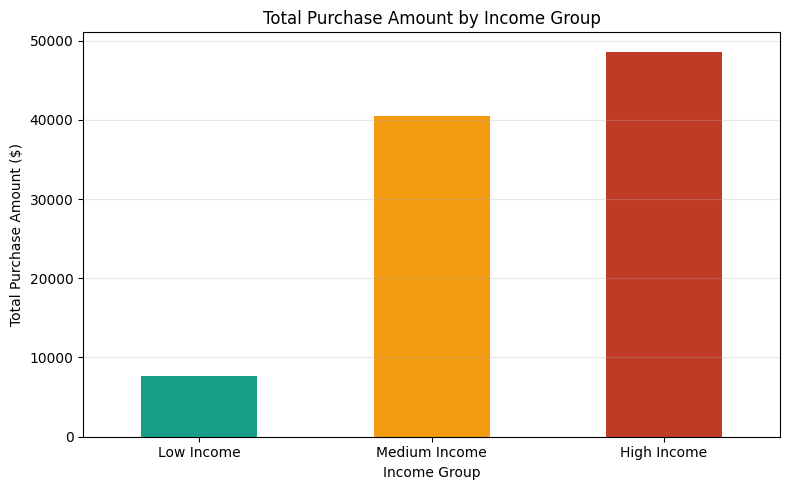

In [6]:
# Plotting total purchase amount by income group
plt.figure(figsize=(8, 5))
df_aggregated["Purchase_Amount_sum"].plot(
    kind="bar", color=["#179E86", "#F59B11", "#C03B26"])
plt.title("Total Purchase Amount by Income Group")
plt.xticks(rotation=0)
plt.xlabel("Income Group")
plt.ylabel("Total Purchase Amount ($)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 6: Visualize Average Spending Score by Income Group

Now let's examine the average spending patterns across income groups.

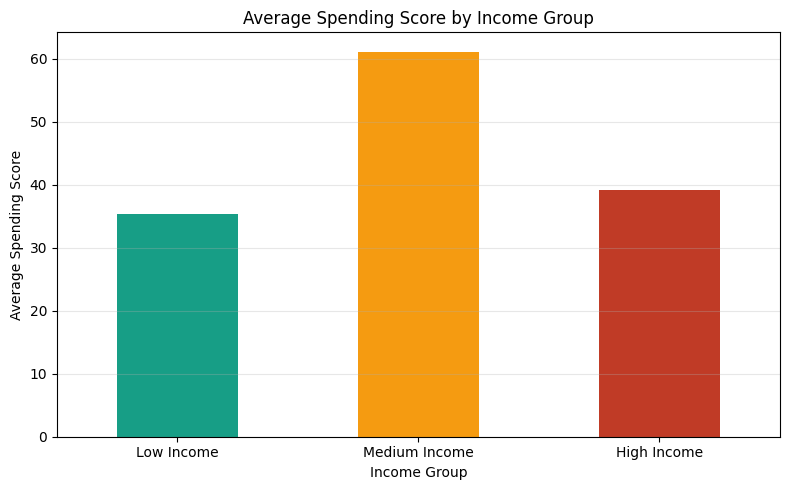

In [7]:
# Plotting average spending score by income group
plt.figure(figsize=(8, 5))
df_aggregated["Spending_Score_mean"].plot(
    kind="bar", color=["#179E86", "#F59B11", "#C03B26"])
plt.title("Average Spending Score by Income Group")
plt.xticks(rotation=0)
plt.xlabel("Income Group")
plt.ylabel("Average Spending Score")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Visualize Average Purchase Amount by Age Group

Let's analyze purchase behavior across different age groups.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_73849/3349546751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby("Age_Group")["Purchase_Amount"].mean()


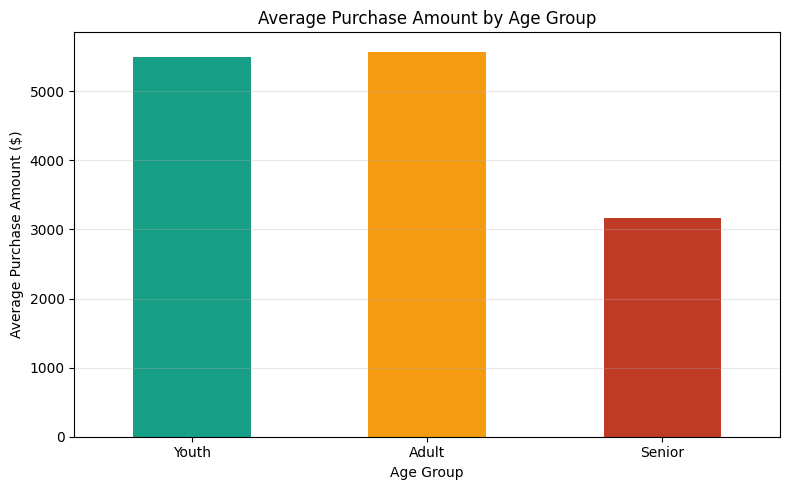

Average Purchase Amount by Age Group:
Age_Group
Youth     5500.000000
Adult     5573.909091
Senior    3170.500000
Name: Purchase_Amount, dtype: float64


In [8]:
# Plotting average purchase amount by age group
plt.figure(figsize=(8, 5))
age_group_avg = df.groupby("Age_Group")["Purchase_Amount"].mean()
age_group_avg.plot(kind="bar", color=["#179E86", "#F59B11", "#C03B26"])
plt.title("Average Purchase Amount by Age Group")
plt.xticks(rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount ($)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Average Purchase Amount by Age Group:")
print(age_group_avg)

## Step 8: Advanced Aggregation Analysis

Let's perform more complex aggregations to gain deeper insights.

In [9]:
# Advanced aggregation: Cross-tabulation of Age Group and Income Group
cross_tab = pd.crosstab(df["Age_Group"], df["Income_Group"], 
                       values=df["Purchase_Amount"], aggfunc='mean')
print("Average Purchase Amount by Age Group and Income Group:")
print(cross_tab.round(2))

# Multiple aggregations at once
detailed_agg = df.groupby(["Age_Group", "Income_Group"]).agg({
    "Purchase_Amount": ["count", "mean", "sum"],
    "Spending_Score": ["mean", "std"]
}).round(2)

print(f"\nDetailed Aggregation by Age and Income Groups:")
print(detailed_agg)

Average Purchase Amount by Age Group and Income Group:
Income_Group  Low Income  Medium Income  High Income
Age_Group                                           
Youth                NaN        7655.00      4422.50
Adult             3730.0        9109.33      4420.83
Senior             261.0        2759.00      4414.67

Detailed Aggregation by Age and Income Groups:
                        Purchase_Amount                 Spending_Score       
                                  count     mean    sum           mean    std
Age_Group Income_Group                                                       
Youth     Low Income                  0      NaN      0            NaN    NaN
          Medium Income               1  7655.00   7655          73.00    NaN
          High Income                 2  4422.50   8845          72.00  16.97
Adult     Low Income                  2  3730.00   7460           8.00   1.41
          Medium Income               3  9109.33  27328          74.33  16.26
        

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_73849/3161596082.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_agg = df.groupby(["Age_Group", "Income_Group"]).agg({


## Step 9: Comprehensive Visualization Dashboard

Let's create a comprehensive visualization comparing different aspects of our aggregated data.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_73849/1028681169.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_age_counts = df.groupby(["Income_Group", "Age_Group"]).size().unstack(fill_value=0)


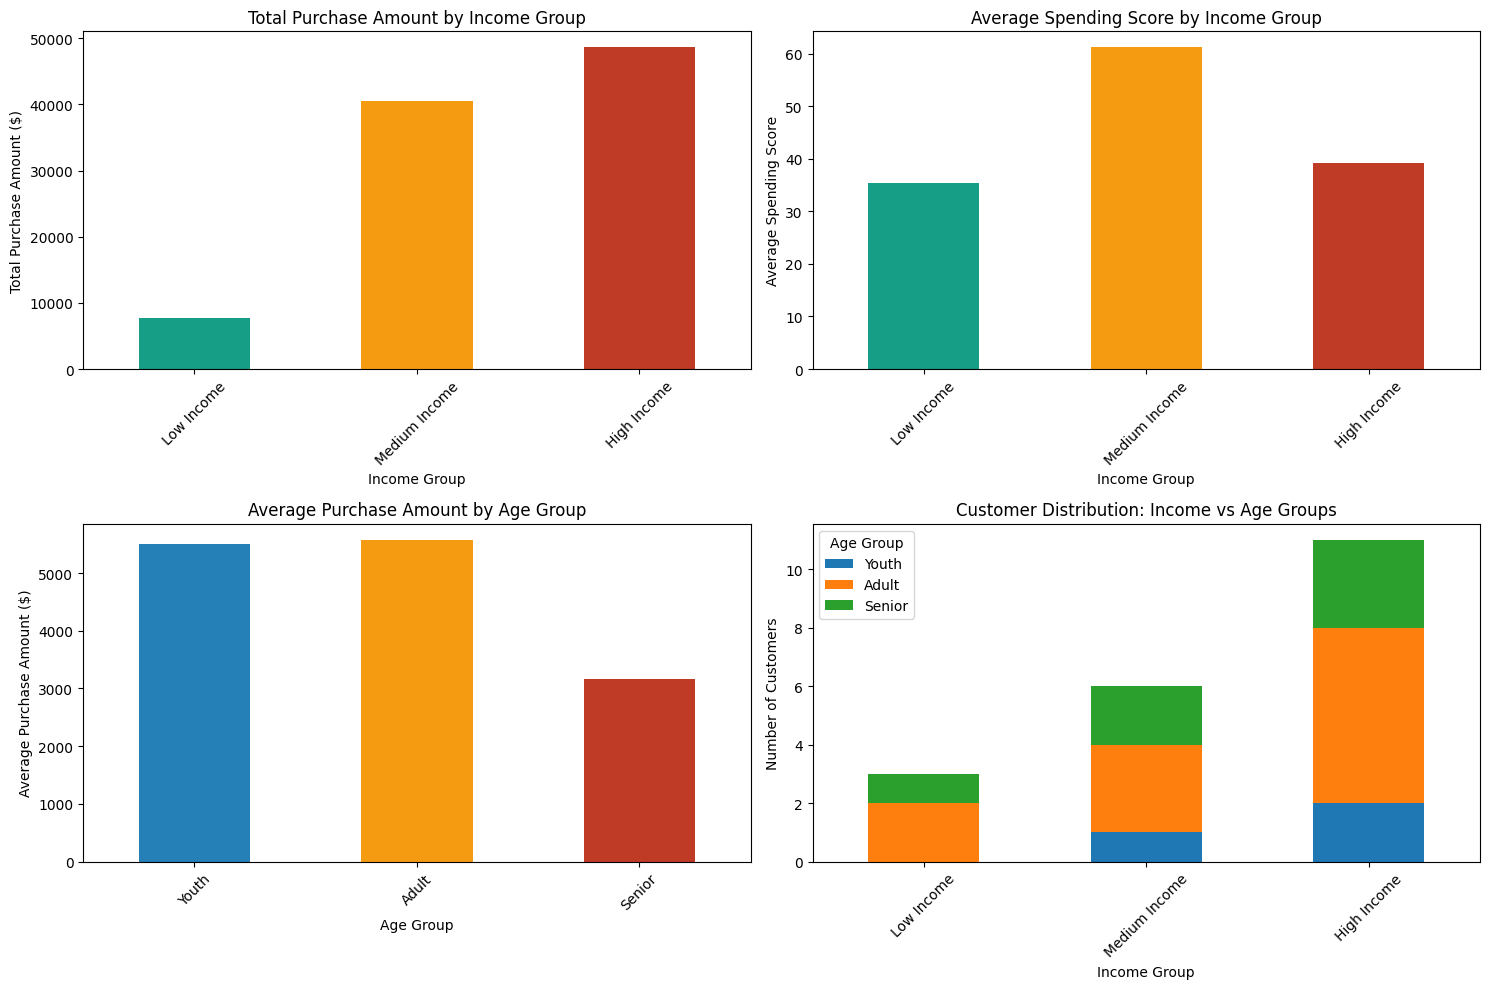

In [10]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total Purchase Amount by Income Group
df_aggregated["Purchase_Amount_sum"].plot(
    kind="bar", ax=axes[0,0], color=["#179E86", "#F59B11", "#C03B26"])
axes[0,0].set_title("Total Purchase Amount by Income Group")
axes[0,0].set_xlabel("Income Group")
axes[0,0].set_ylabel("Total Purchase Amount ($)")
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average Spending Score by Income Group
df_aggregated["Spending_Score_mean"].plot(
    kind="bar", ax=axes[0,1], color=["#179E86", "#F59B11", "#C03B26"])
axes[0,1].set_title("Average Spending Score by Income Group")
axes[0,1].set_xlabel("Income Group")
axes[0,1].set_ylabel("Average Spending Score")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Average Purchase Amount by Age Group
age_group_avg.plot(kind="bar", ax=axes[1,0], color=["#2580B7", "#F59B11", "#C03B26"])
axes[1,0].set_title("Average Purchase Amount by Age Group")
axes[1,0].set_xlabel("Age Group")
axes[1,0].set_ylabel("Average Purchase Amount ($)")
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Distribution of customers by Income and Age Groups
income_age_counts = df.groupby(["Income_Group", "Age_Group"]).size().unstack(fill_value=0)
income_age_counts.plot(kind="bar", ax=axes[1,1], stacked=True)
axes[1,1].set_title("Customer Distribution: Income vs Age Groups")
axes[1,1].set_xlabel("Income Group")
axes[1,1].set_ylabel("Number of Customers")
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title="Age Group")

plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored two fundamental data transformation techniques:

### Data Aggregation:
- **Purpose**: Summarize large datasets by grouping and calculating statistics
- **Techniques Used**:
  - Groupby operations with multiple aggregation functions
  - Cross-tabulation for multi-dimensional analysis
  - Statistical summaries (sum, mean, count, std)
- **Benefits**: 
  - Reduces data complexity
  - Reveals patterns and trends
  - Enables high-level business insights

### Data Discretization:
- **Purpose**: Convert continuous variables into categorical bins
- **Techniques Used**:
  - Equal-width binning using `pd.cut()`
  - Custom bin definitions with meaningful labels
  - Age and income categorization
- **Benefits**:
  - Simplifies analysis and interpretation
  - Reduces noise in continuous data
  - Enables categorical analysis methods

### Key Insights from Our Analysis:

1. **Income-Based Patterns**:
   - Higher income groups show different spending behaviors
   - Aggregation reveals total vs. average spending patterns
   
2. **Age-Based Segmentation**:
   - Different age groups exhibit distinct purchase behaviors
   - Discretization enables clear demographic analysis
   
3. **Cross-Dimensional Analysis**:
   - Combining age and income groups provides deeper insights
   - Multi-level aggregations reveal complex relationships

### Best Practices Demonstrated:

- **Meaningful Binning**: Use domain knowledge to create logical categories
- **Multiple Aggregations**: Apply various statistical measures for comprehensive analysis
- **Visualization**: Always visualize aggregated data to identify patterns
- **Cross-Validation**: Check aggregation results against business logic

These techniques are essential for exploratory data analysis, feature engineering, and preparing data for machine learning models!